<a href="https://colab.research.google.com/github/mrfabien/MLEE_project/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.__version__
#%pip install pandas==1.4.1

'1.4.1'

In [3]:
path_75 = '/content/df_europewinds_75.pkl'
path_95 = '/content/df_europewinds_95.pkl'

In [6]:
data_75 = pd.read_pickle(open(path_75, 'rb'))
data_75.head()

,year,index,bss0_1_mean,bss0_1_std,bss0_6_mean,bss0_6_std,rh1000_850_mean,rh1000_850_std,rh700_500_mean,rh700_500_std,...,lapse_s1_mean,lapse_s1_std,lapse700_500_mean,lapse700_500_std,total_totals_mean,total_totals_std,kindex_mean,kindex_std,cape_mean,cape_std
0,0,0,5.566746,1.409852,20.841965,2.403776,38.471111,5.528201,39.340164,4.507432,...,3.937160,1.835161,7.434533,0.157927,-223.870316,2.545162,-241.414597,1.920714,1.470943e+06,47421.042969
1,0,1,9.117043,2.212430,15.022616,1.769653,91.150574,4.519768,95.393280,3.446400,...,6.827473,0.361492,4.986881,0.123315,-230.567856,1.326195,-256.065704,2.432208,7.463997e+05,29720.560547
2,0,1,3.349157,1.543636,14.397669,1.997612,94.999939,3.762975,96.936325,2.179418,...,7.025648,0.705598,5.416773,0.279987,-229.407089,0.455871,-254.261292,0.960245,7.808471e+05,32203.679688
3,0,1,3.522637,1.343964,6.980061,1.558338,86.109894,6.356337,87.546326,8.126277,...,6.696632,0.315548,6.247573,0.096321,-225.117264,0.556208,-242.131607,0.737710,3.299286e+05,44017.738281
4,0,1,2.906259,1.306351,18.640661,0.778727,76.630363,11.766706,75.178864,5.603858,...,5.132456,0.965875,6.791603,0.163507,-221.258957,0.740583,-236.590332,0.754513,8.468746e+05,69275.562500


In [7]:
data_95 = pd.read_pickle(open(path_95, 'rb'))
data_95.head()

,year,index,bss0_1_mean,bss0_1_std,bss0_6_mean,bss0_6_std,rh1000_850_mean,rh1000_850_std,rh700_500_mean,rh700_500_std,...,lapse_s1_mean,lapse_s1_std,lapse700_500_mean,lapse700_500_std,total_totals_mean,total_totals_std,kindex_mean,kindex_std,cape_mean,cape_std
0,0,0,4.277383,1.872966,8.982351,0.724258,93.492226,5.035859,88.534180,5.347477,...,6.906764,1.327869,6.136250,0.066148,-229.698380,2.886750,-253.835098,3.049098,2.026168e+05,14708.218750
1,0,0,1.802277,0.753601,15.204497,0.530935,59.056320,1.762953,41.138809,20.166151,...,7.818282,0.271740,6.264568,0.162757,-229.545853,2.025261,-257.027924,5.805379,1.180107e+06,50493.390625
2,0,0,0.715803,0.243926,16.503664,0.667165,59.690506,3.856417,24.401155,8.628385,...,7.912159,0.212544,6.037870,0.176981,-230.075562,1.594442,-261.277252,2.990737,1.271284e+06,24269.503906
3,0,0,1.606050,1.158768,18.095135,1.584871,29.221788,1.806868,54.221584,3.082348,...,7.784466,0.688592,8.378917,0.154145,-220.908508,0.992791,-244.325333,1.691479,1.316592e+06,54253.433594
4,0,0,0.307757,0.309118,13.387435,1.153533,29.046917,3.302094,55.367680,3.316934,...,6.988350,0.134230,8.529189,0.123378,-221.513565,0.656967,-246.688919,0.659492,1.148537e+06,25503.769531


In [11]:
data_75['intensity']=0
data_95['intensity']=1

In [28]:
data_merged = pd.concat((data_75,data_95))
y = data_merged['intensity']
X = data_merged.iloc[:,2:-1]
features_names = X.keys()


,bss0_1_mean,bss0_1_std,bss0_6_mean,bss0_6_std,rh1000_850_mean,rh1000_850_std,rh700_500_mean,rh700_500_std,gustex_mean,gustex_std,lapse_s1_mean,lapse_s1_std,lapse700_500_mean,lapse700_500_std,total_totals_mean,total_totals_std,kindex_mean,kindex_std,cape_mean,cape_std
0,5.566746,1.409852,20.841965,2.403776,38.471111,5.528201,39.340164,4.507432,7.482371,0.113350,3.937160,1.835161,7.434533,0.157927,-223.870316,2.545162,-241.414597,1.920714,1.470943e+06,47421.042969
1,9.117043,2.212430,15.022616,1.769653,91.150574,4.519768,95.393280,3.446400,6.177876,0.128299,6.827473,0.361492,4.986881,0.123315,-230.567856,1.326195,-256.065704,2.432208,7.463997e+05,29720.560547
2,3.349157,1.543636,14.397669,1.997612,94.999939,3.762975,96.936325,2.179418,5.913085,0.193444,7.025648,0.705598,5.416773,0.279987,-229.407089,0.455871,-254.261292,0.960245,7.808471e+05,32203.679688
3,3.522637,1.343964,6.980061,1.558338,86.109894,6.356337,87.546326,8.126277,4.268257,0.448312,6.696632,0.315548,6.247573,0.096321,-225.117264,0.556208,-242.131607,0.737710,3.299286e+05,44017.738281
4,2.906259,1.306351,18.640661,0.778727,76.630363,11.766706,75.178864,5.603858,7.767873,0.427087,5.132456,0.965875,6.791603,0.163507,-221.258957,0.740583,-236.590332,0.754513,8.468746e+05,69275.562500


In [56]:
features_names = X.keys()

In [59]:
features_names = ['bss0_1_mean', 'bss0_1_std', 'bss0_6_mean', 'bss0_6_std',
       'rh1000_850_mean', 'rh1000_850_std', 'rh700_500_mean', 'rh700_500_std',
       'gustex_mean', 'gustex_std', 'lapse_s1_mean', 'lapse_s1_std',
       'lapse700_500_mean', 'lapse700_500_std', 'total_totals_mean',
       'total_totals_std', 'kindex_mean', 'kindex_std', 'cape_mean',
       'cape_std']

In [33]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, train_size=0.8)

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, train_size=0.8)

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
# The estimated coefficients will all be around 1:

print(lr.coef_)
np.shape(lr.coef_)

[[ 1.35510556e-05  8.14765846e-07 -3.80090501e-05 -1.57797090e-06
  -4.12286549e-04 -3.59862941e-05 -3.59213874e-04 -3.50332713e-05
  -1.46116622e-05 -1.96480637e-06 -4.63514873e-05 -5.46947263e-06
  -4.37146705e-05 -5.29280861e-07  1.42785966e-03 -5.99016650e-06
   1.54750329e-03 -1.04848892e-05  3.04178282e-07  8.60885452e-07]]


(1, 20)

In [47]:
std_train = X_train.std(axis=0)
print(std_train)

bss0_1_mean               3.455049
bss0_1_std                0.882766
bss0_6_mean               6.472522
bss0_6_std                0.988877
rh1000_850_mean          14.073116
rh1000_850_std            2.575504
rh700_500_mean           18.861685
rh700_500_std             3.668919
gustex_mean               3.293169
gustex_std                0.363428
lapse_s1_mean             1.668772
lapse_s1_std              0.461509
lapse700_500_mean         0.688822
lapse700_500_std          0.089301
total_totals_mean         4.756746
total_totals_std          0.778720
kindex_mean               6.203886
kindex_std                1.444140
cape_mean            890285.750000
cape_std              93296.335938
dtype: float32


In [49]:
# Those values, however, will show that the second parameter
# is more influential
print(std_train*lr.coef_[0,:])

bss0_1_mean          4.681956e-05
bss0_1_std           7.192477e-07
bss0_6_mean         -2.460144e-04
bss0_6_std          -1.560419e-06
rh1000_850_mean     -5.802157e-03
rh1000_850_std      -9.268285e-05
rh700_500_mean      -6.775379e-03
rh700_500_std       -1.285342e-04
gustex_mean         -4.811867e-05
gustex_std          -7.140653e-07
lapse_s1_mean       -7.735004e-05
lapse_s1_std        -2.524210e-06
lapse700_500_mean   -3.011161e-05
lapse700_500_std    -4.726543e-08
total_totals_mean    6.791965e-03
total_totals_std    -4.664660e-06
kindex_mean          9.600534e-03
kindex_std          -1.514164e-05
cape_mean            2.708056e-01
cape_std             8.031746e-02
dtype: float64


In [51]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
import time

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.365 seconds


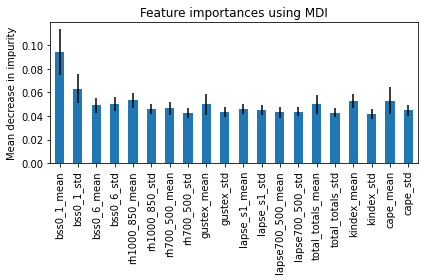

In [61]:
forest_importances = pd.Series(importances, index=features_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [62]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features_names)

Elapsed time to compute the importances: 51.843 seconds


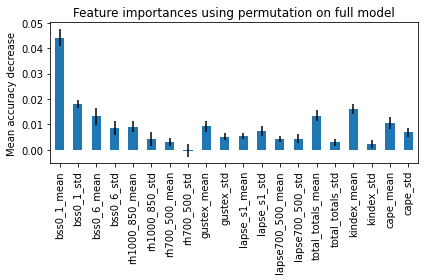

In [63]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()